# Errors in Variables and Regression Dilution

Recall that one of the assumptions of Ordinary Least Squares is that the error is entirely in the dependent $Y$ variable.  Least squares fitting of the optimal solution and the estimation of the coefficients therefore operates by minimizing the distance between the model fit with respect to the dependent variable (y) axis.

However, it is often true in the real world that both $X$ and $Y$ are measured or known only with some uncertainty.  When this is the case, OLS can perform poorly and give potentially misleading results.  Here we're going to look at a particular case of regression dilution.

Let's start by repeating our exercise from earlier notebooks:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
# plt.rcParams['font.family'] = 'Helvetica'

C:\Users\mayae\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


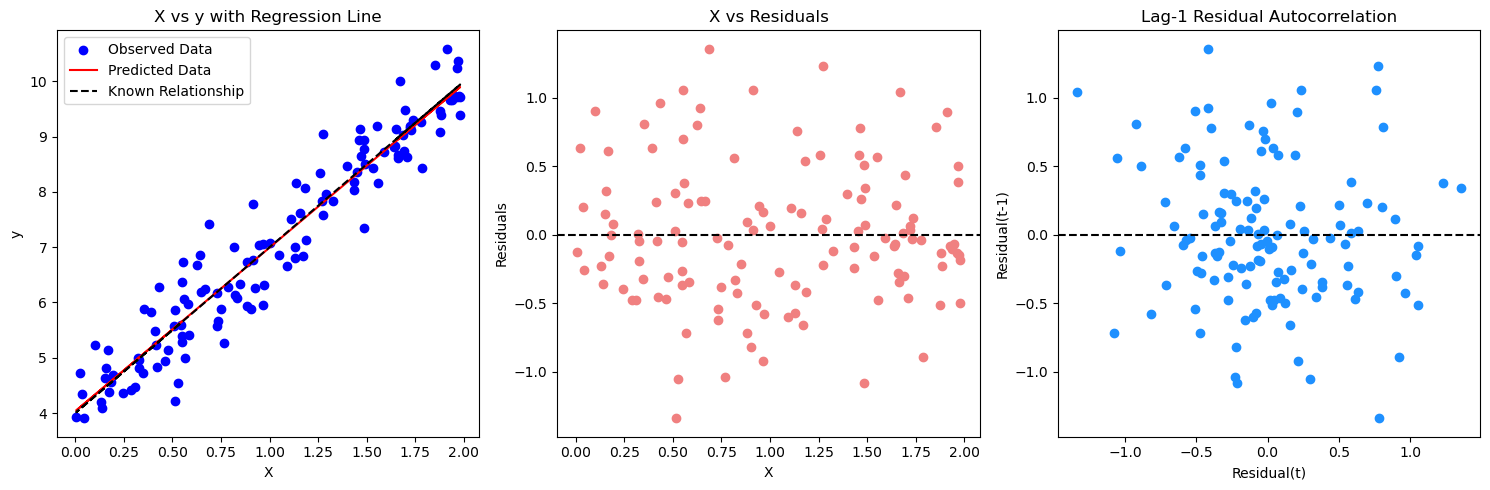

In [3]:
# First, generate the same synthetic data
np.random.seed(1999)  # seed for class reproducibility
n_samples = 128

# Create the independent variable X and the noise
noise_magnitude = 0.5
X = 2* np.random.rand(n_samples, 1)
noise = noise_magnitude * np.random.randn(n_samples, 1)

# Set the intercept and slope
intercept = 4
slope = 3

# Create the dependent variable y
y = intercept + (slope * X) + noise

# create a 'noise free' line for plotting in this exercise, too
y_known = intercept + (slope * X)

# add constant term column to X
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels OLS
model = sm.OLS(y, X_with_constant)

# fit the model
results = model.fit()

# Predict y using our model - be sure to pass .predict the matrix with the constant term column!
y_pred = results.predict(X_with_constant)


##  Create the diagnostic plots
plt.figure(figsize=(15, 5))

# First plot: Observed vs Predicted data with regression line
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, y_pred, color='red', label='Predicted Data')
plt.plot(X, y_known, color='black', linestyle='--', label='Known Relationship')

plt.title('X vs y with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Second plot: Residuals vs X
residuals = y.ravel() - y_pred # note that we need to flatten or `ravel` y here because statsmodels makes y_pred a singleton variable (128,), whereas y is (128,1) !

plt.subplot(1, 3, 2)
plt.scatter(X, residuals, color='lightcoral')
plt.axhline(0, color='black', linestyle='--')
plt.title('X vs Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')

# Third plot: Lagged residual autocorrelation
residuals_shifted = np.roll(residuals, 1)

plt.subplot(1, 3, 3)
plt.scatter(residuals[1:], residuals_shifted[1:], color='dodgerblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lag-1 Residual Autocorrelation')
plt.ylabel('Residual(t-1)')
plt.xlabel('Residual(t)')

plt.tight_layout()
plt.show()

Let's re-generate our synthetic series but change the magnitude of the noise:

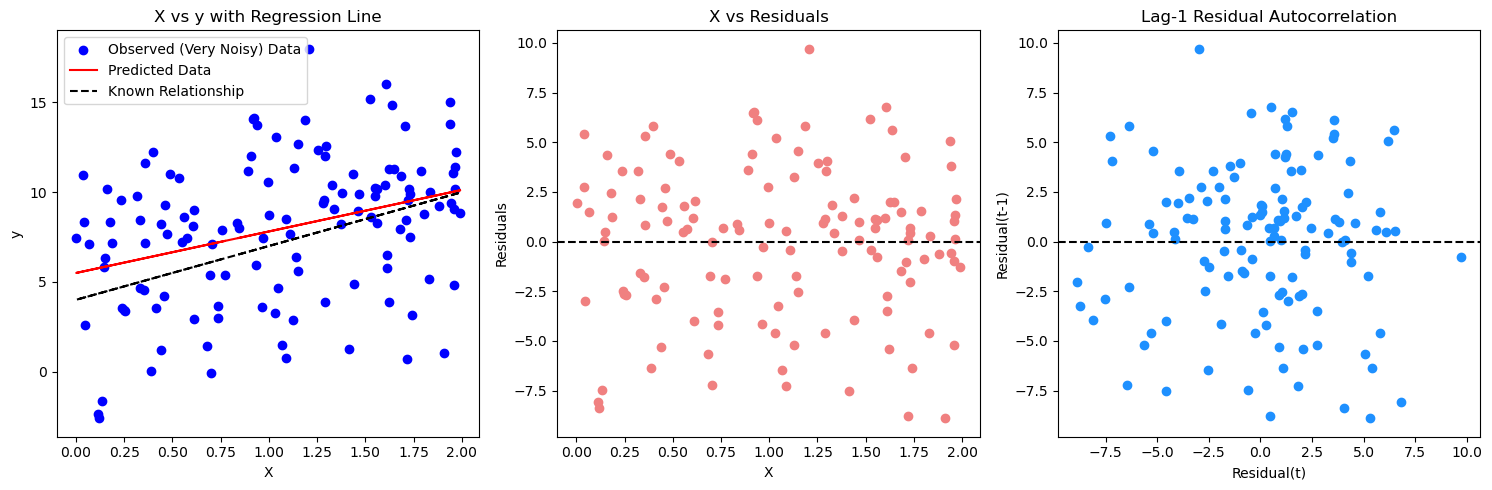

In [6]:
# Create the independent variable X and the noise
noise_magnitude = 4
X = 2* np.random.rand(n_samples, 1)
noise = noise_magnitude * np.random.randn(n_samples, 1)

# Set the intercept and slope
intercept = 4
slope = 3

# Create the dependent variable y
y = intercept + (slope * X) + noise

# create a 'noise free' line for plotting in this exercise, too
y_known = intercept + (slope * X)

# add constant term column to X
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels OLS
model = sm.OLS(y, X_with_constant)

# fit the model
results = model.fit()

# Predict y using our model - be sure to pass .predict the matrix with the constant term column!
y_pred = results.predict(X_with_constant)


##  Create the diagnostic plots
plt.figure(figsize=(15, 5))

# First plot: Observed vs Predicted data with regression line
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Observed (Very Noisy) Data')
plt.plot(X, y_pred, color='red', label='Predicted Data')
plt.plot(X, y_known, color='black', linestyle='--', label='Known Relationship')

plt.title('X vs y with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Second plot: Residuals vs X
residuals = y.ravel() - y_pred # note that we need to flatten or `ravel` y here because statsmodels makes y_pred a singleton variable (128,), whereas y is (128,1) !

plt.subplot(1, 3, 2)
plt.scatter(X, residuals, color='lightcoral')
plt.axhline(0, color='black', linestyle='--')
plt.title('X vs Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')

# Third plot: Lagged residual autocorrelation
residuals_shifted = np.roll(residuals, 1)

plt.subplot(1, 3, 3)
plt.scatter(residuals[1:], residuals_shifted[1:], color='dodgerblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lag-1 Residual Autocorrelation')
plt.ylabel('Residual(t-1)')
plt.xlabel('Residual(t)')

plt.tight_layout()
plt.show()

Note that despite the much larger noise magnitude, the estimated regression line still tracks the known linear relationship!  OLS is robust to noise in the $y$ variable, assuming the other assumptions about the nature of the noise are still (mostly) true.

**Try changing the noise magnitude above and see what happens**

But what happens if we add noise to $y$ and try and estimate the coefficients? 

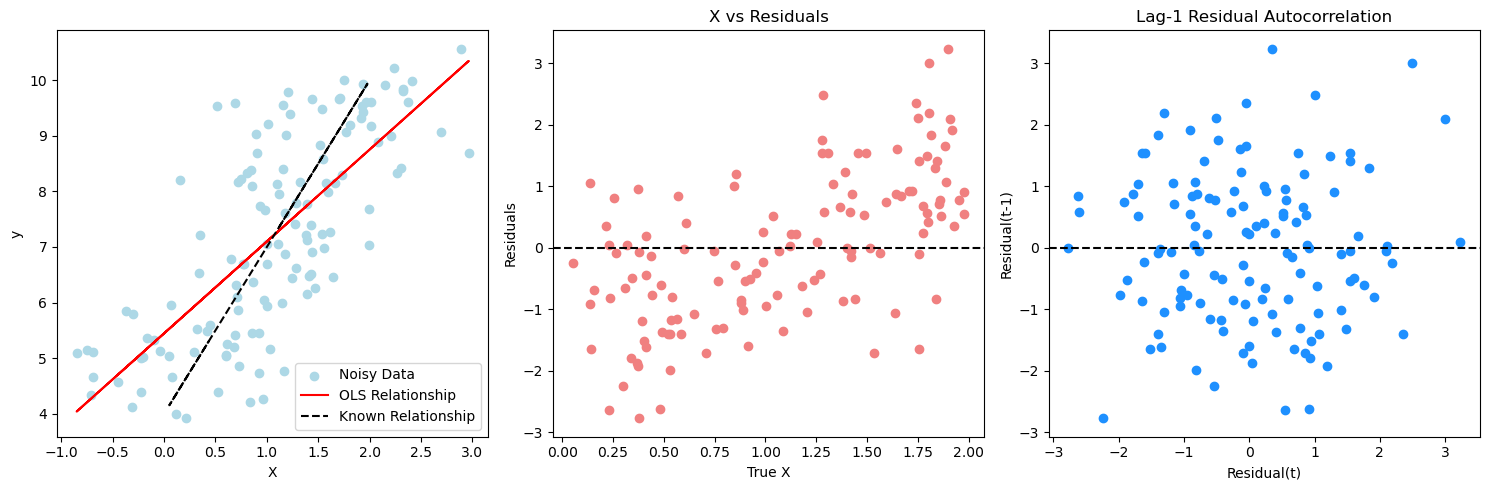

In [5]:
# Create the independent variable X and the noise
noise_magnitude = 0.5
noise_magnitude_x = 0.5

true_X = 2 * np.random.rand(n_samples, 1) # the 'real' X without noise

noise = noise_magnitude * np.random.randn(n_samples, 1) # noise to add to Y, essentially
x_noise = noise_magnitude_x * np.random.randn(n_samples, 1) # noise to add to X

# Set the intercept and slope
intercept = 4 # real intercept
slope = 3 # real slope

# create a 'noise free' line for plotting in this exercise, too
y_known = intercept + (slope * true_X) # the real underlying relationship with intercept 4 and slope 3

noise_X = true_X + x_noise # a noisy version of X where X is not observed without error

# Create the dependent variable y
y = intercept + (slope * true_X) + noise # a noisy version of y 

# add constant term column to the noisy version of X
X_with_constant = sm.add_constant(noise_X)

# Fit the model using statsmodels OLS
model = sm.OLS(y, X_with_constant)

# fit the model, noise in both y and X
results = model.fit()

# Predict y using our model - be sure to pass .predict the matrix with the constant term column!
y_pred = results.predict(X_with_constant)

##  Create the diagnostic plots
plt.figure(figsize=(15, 5))

# First plot: Observed vs Predicted data with regression line
plt.subplot(1, 3, 1)
# plt.scatter(true_X, y, color='blue', label='True Data')
plt.scatter(noise_X, y, color='lightblue', label='Noisy Data')
plt.plot(noise_X, y_pred, color='red', label='OLS Relationship')
plt.plot(true_X, y_known, color='black', linestyle='--', label='Known Relationship')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Second plot: Residuals vs X
residuals = y.ravel() - y_pred # note that we need to flatten or `ravel` y here because statsmodels makes y_pred a singleton variable (128,), whereas y is (128,1) !

plt.subplot(1, 3, 2)
plt.scatter(true_X, residuals, color='lightcoral')
plt.axhline(0, color='black', linestyle='--')
plt.title('X vs Residuals')
plt.xlabel('True X')
plt.ylabel('Residuals')

# Third plot: Lagged residual autocorrelation
residuals_shifted = np.roll(residuals, 1)

plt.subplot(1, 3, 3)
plt.scatter(residuals[1:], residuals_shifted[1:], color='dodgerblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lag-1 Residual Autocorrelation')
plt.ylabel('Residual(t-1)')
plt.xlabel('Residual(t)')

plt.tight_layout()
plt.show()

Adding error to the X (independent variable) results in an attenuation of the slope -- enough unaccounted for noise in X will lead to a flat slope and an underestimation of the true magnitude of the relationship between X and Y!

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.50
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           8.51e-05
Time:                        13:34:41   Log-Likelihood:                -352.66
No. Observations:                 128   AIC:                             709.3
Df Residuals:                     126   BIC:                             715.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4960      0.691      7.959      0.000       4.129       6.863
x1             2.3140      0.570      4.062      0.000       1.187       3.441
==============================================================================
Omnibus:                        2.163   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                2.212
Skew:                          -0.293   Prob(JB):                        0.331
Kurtosis:                       2.733   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## An errors-in-variables approach

Errors-in-variables regression methods (of which there are many) either implicitly or quantitatively allow for error or uncertainty in both the dependent and independent variables.  A few common approaches to error-in-variables regression include [Total Least Squares](https://en.wikipedia.org/wiki/Total_least_squares) and [Deming Regression](https://en.wikipedia.org/wiki/Deming_regression).  [York regression](https://pubs.aip.org/aapt/ajp/article/72/3/367/1042020/Unified-equations-for-the-slope-intercept-and) extends Deming regression by allowing correlated errors. A number of [bivariate ](https://en.wikipedia.org/wiki/Bivariate_analysis) and [orthogonal regresssion](https://docs.scipy.org/doc/scipy/reference/odr.html) methods allow for errors in both independent and dependent variables to be accounted for when finding optimal regression models. 

Here, I'll just demonstrate a simple implementation of the Deming regression method.  Deming regression makes some assumptions about the errors in $X$ and $Y$: that they are independent and normally distributed and the ratio of the error variances for $X$ and $Y$ are known.  Depending on the circumstances, this latter in particular might not be true, so the code below uses a default ratio of 1 (e.g. the error magnitudes are equal for $X$ and $Y$). 

In [9]:
def deming(x, y, delta=1):
    """Fit a Deming regression model and return slope and intercept

    Inputs
    ----------
    x : array-like
    y : array-like, same shape as x
    delta: Ratio of the error variances if known

    Outputs
    -------
    slope : float, Slope of the fitted line.
    intercept : float, Intercept of the fitted line.
    """
    
    # make sure everything is an array
    x = np.asanyarray(x)
    y = np.asanyarray(y)
    
    # make sure dimensions are correct for linear algebra below
    x = np.ravel(x)
    y = np.ravel(y)
    
    # get the length of the series   
    n = np.size(x)    
    
    # series means    
    mx = x.mean()
    my = y.mean()
    
    # series variances accounting for error variance ratio (default ratio is 1)
    ds = y.var(ddof=1) - delta * x.var(ddof=1)
    
    # covariance of the centered data series 
    sxy = np.dot(x - mx, y - my) / (n - 1)
    
    # calculate slope as a function of variances and covariances
    slope = (ds + np.sqrt(ds**2 + 4 * sxy**2)) / (2 * sxy)
    
    # intercept based then on slope
    intercept = my - slope * mx
    
    return slope, intercept

In [10]:
# Create the independent variable X and the noise - we'll set the magnitude of the error to be the same for now - but what happens if you change this ratio and don't account for that? 
noise_magnitude = 0.5 
noise_magnitude_x = 0.5

true_X = 2 * np.random.rand(n_samples, 1) # the 'real' X without noise

noise = noise_magnitude * np.random.randn(n_samples, 1) # noise to add to Y, essentially
x_noise = noise_magnitude_x * np.random.randn(n_samples, 1) # noise to add to X

# Set the intercept and slope
intercept = 4 # real intercept
slope = 3 # real slope

# create a 'noise free' line for plotting in this exercise, too
y_known = intercept + (slope * true_X) # the real underlying relationship with intercept 4 and slope 3

noise_X = true_X + x_noise # a noisy version of X

# Create the dependent variable y
y = intercept + (slope * true_X) + noise # a noisy version of y accounting for noisy X?

In [11]:
deming_slope, deming_intercept = deming(noise_X.flatten(), y)
y_pred = deming_slope * noise_X + deming_intercept

# add constant term column to X
X_with_constant = sm.add_constant(noise_X)
model = sm.OLS(y, X_with_constant)
results = model.fit()
y_pred_ols = results.predict(X_with_constant)


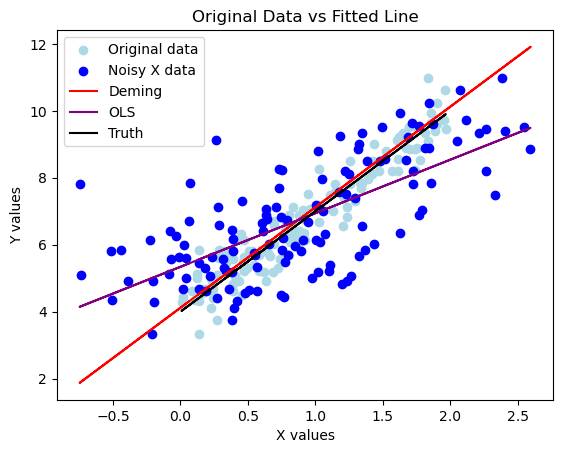

In [12]:
# Plot the original data points and the fitted line
plt.scatter(true_X, y, color='lightblue', label='Original data')  # Scatter plot of original data
plt.scatter(noise_X, y, color='blue', label='Noisy X data')  # Scatter plot of original data

plt.plot(noise_X, y_pred, color='red', label='Deming')  # Line of best fit
plt.plot(noise_X, y_pred_ols, color='purple', label='OLS')
plt.plot(true_X, y_known, color='black', label='Truth')  # Line of best fit


# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Original Data vs Fitted Line')
plt.legend()

# Show the plot
plt.show()